In [83]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt

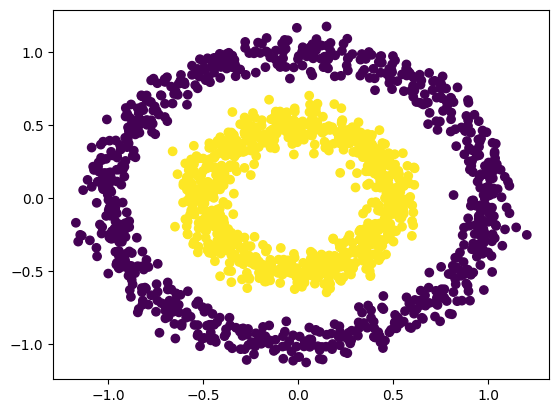

In [84]:
X, y = make_circles(n_samples=2000, factor=0.5, noise=0.07)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float().unsqueeze(1)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 10)
        self.linear2 = nn.Linear(10, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 1)
        self.reLU = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.sigmoid(
            self.linear4(
                self.reLU(
                    self.linear3(self.reLU(self.linear2(self.reLU(self.linear(x)))))
                )
            )
        )

In [86]:
model = Classifier()

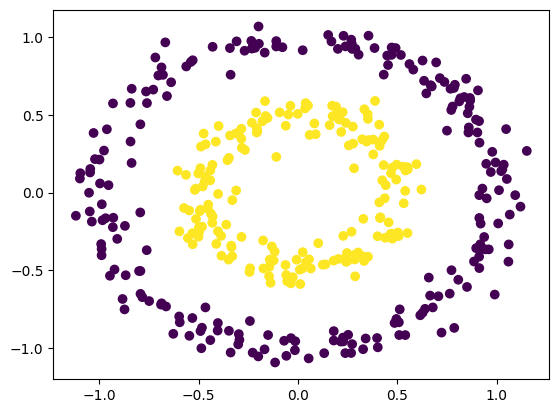

In [92]:
with torch.inference_mode():
    predictions = model(X_test)
    predictions = torch.round(predictions)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
    plt.show()

In [88]:
def trainer(epochs, model, loss_fn, optimizer, X_train, y_train):
    model.train(True)
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"{epoch} {loss}")

In [91]:
learning_rate = 0.01

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

trainer(10000, model, loss_fn, optimizer, X_train, y_train)

0 0.013540882617235184
100 0.012914061546325684
200 0.01233669649809599
300 0.011803788132965565
400 0.011310710571706295
500 0.010853247717022896
600 0.010427694767713547
700 0.010031439363956451
800 0.009662043303251266
900 0.009316394105553627
1000 0.008992656134068966
1100 0.008688981644809246
1200 0.008403819054365158
1300 0.00813437718898058
1400 0.007878529839217663
1500 0.007636694237589836
1600 0.007407192140817642
1700 0.007190064061433077
1800 0.0069845556281507015
1900 0.006789423990994692
2000 0.006604282651096582
2100 0.0064284177497029305
2200 0.006261087022721767
2300 0.006101679988205433
2400 0.005949527025222778
2500 0.005804259795695543
2600 0.005665512289851904
2700 0.005532714072614908
2800 0.0054055871441960335
2900 0.00528383906930685
3000 0.0051672188565135
3100 0.005055408459156752
3200 0.004948073998093605
3300 0.004844833631068468
3400 0.004745509009808302
3500 0.004649288021028042
3600 0.004556458443403244
3700 0.0044670794159173965
3800 0.004380935803055763